In [4]:
file_path = "dataset_limpio (1).csv"
df = pd.read_csv(file_path)

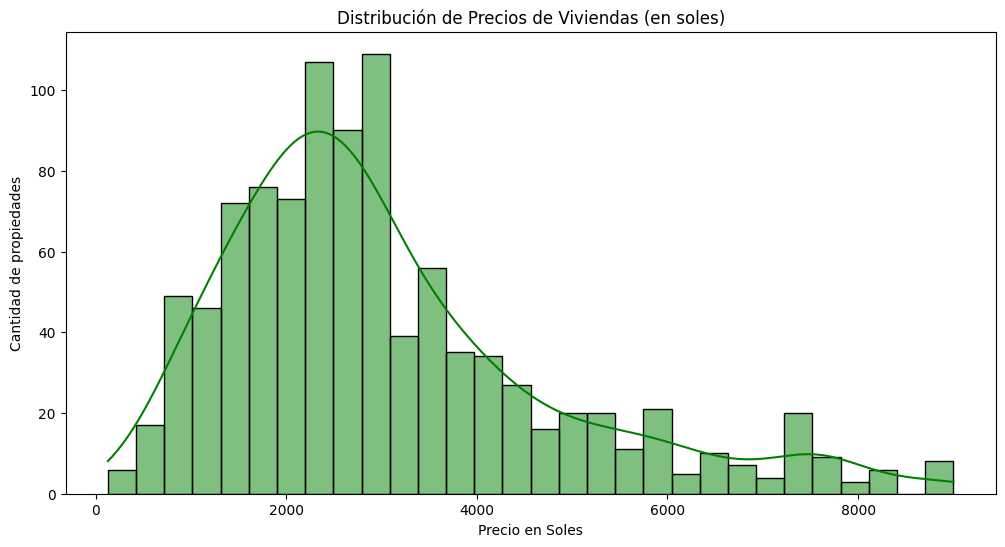

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df["price_final_pen"], bins=30, color="green", kde=True)
plt.title("Distribución de Precios de Viviendas (en soles)")
plt.xlabel("Precio en Soles")
plt.ylabel("Cantidad de propiedades")
plt.show()

/tmp/ipython-input-4023994869.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="housing_type", y="price_final_pen", data=df, ci=None)


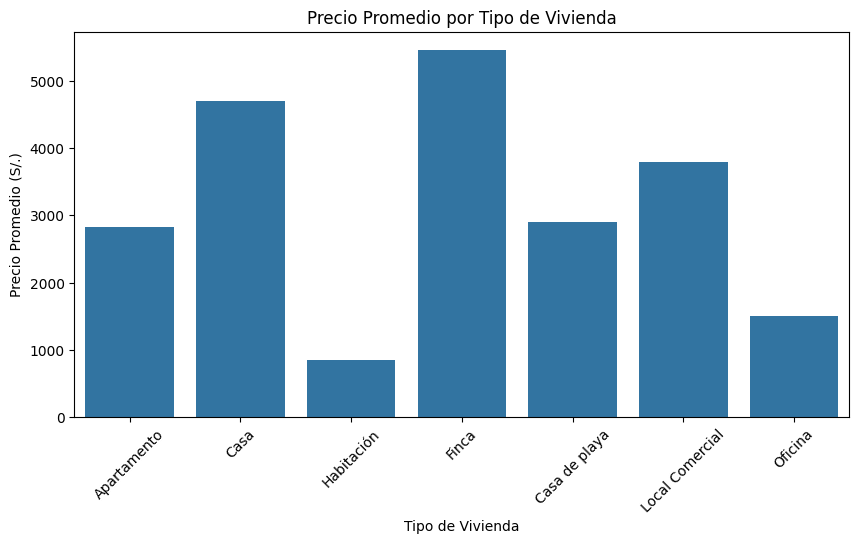

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(x="housing_type", y="price_final_pen", data=df, ci=None)
plt.title("Precio Promedio por Tipo de Vivienda")
plt.xlabel("Tipo de Vivienda")
plt.ylabel("Precio Promedio (S/.)")
plt.xticks(rotation=45)
plt.show()

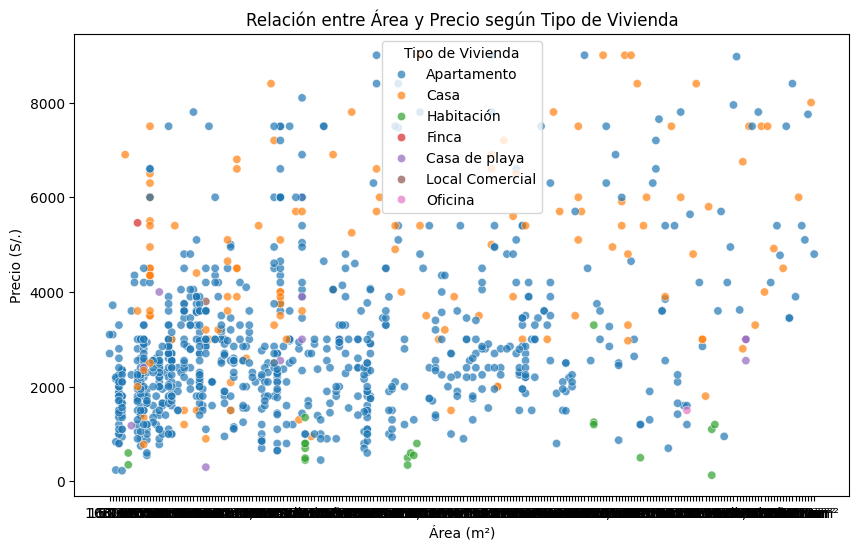

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="area", y="price_final_pen", hue="housing_type", data=df, alpha=0.7)
plt.title("Relación entre Área y Precio según Tipo de Vivienda")
plt.xlabel("Área (m²)")
plt.ylabel("Precio (S/.)")
plt.legend(title="Tipo de Vivienda")
plt.show()

/tmp/ipython-input-607276589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bedroom", y="price_final_pen", data=df, palette="coolwarm")


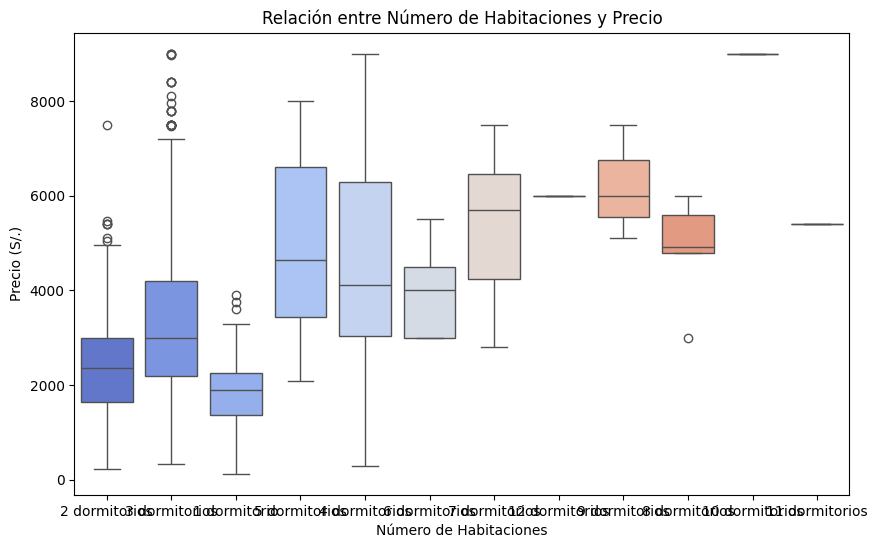

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x="bedroom", y="price_final_pen", data=df, palette="coolwarm")
plt.title("Relación entre Número de Habitaciones y Precio")
plt.xlabel("Número de Habitaciones")
plt.ylabel("Precio (S/.)")
plt.show()

/tmp/ipython-input-2061940050.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="housing_type", y="maintenance_num", data=df, ci=None, palette="mako")
/tmp/ipython-input-2061940050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="housing_type", y="maintenance_num", data=df, ci=None, palette="mako")


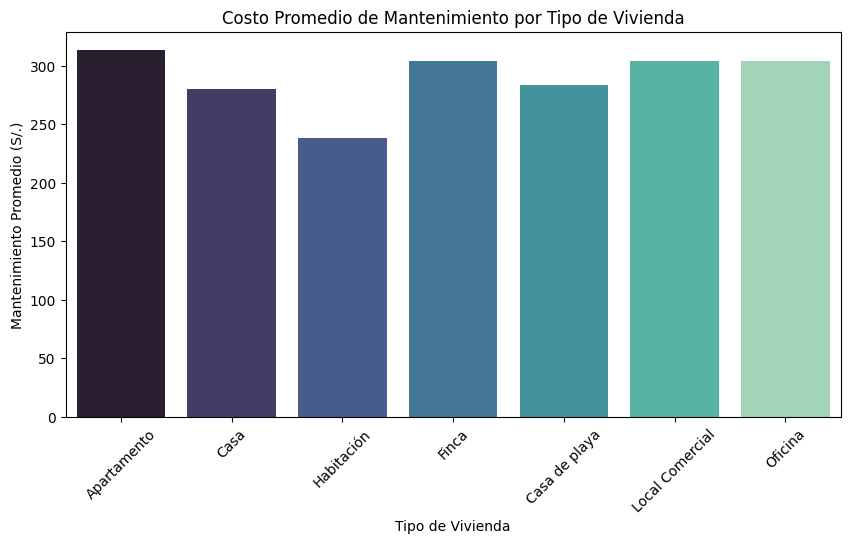

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x="housing_type", y="maintenance_num", data=df, ci=None, palette="mako")
plt.title("Costo Promedio de Mantenimiento por Tipo de Vivienda")
plt.xlabel("Tipo de Vivienda")
plt.ylabel("Mantenimiento Promedio (S/.)")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2090539720.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="bedroom", y="price_final_pen", data=avg_price_per_bedroom, palette="viridis")


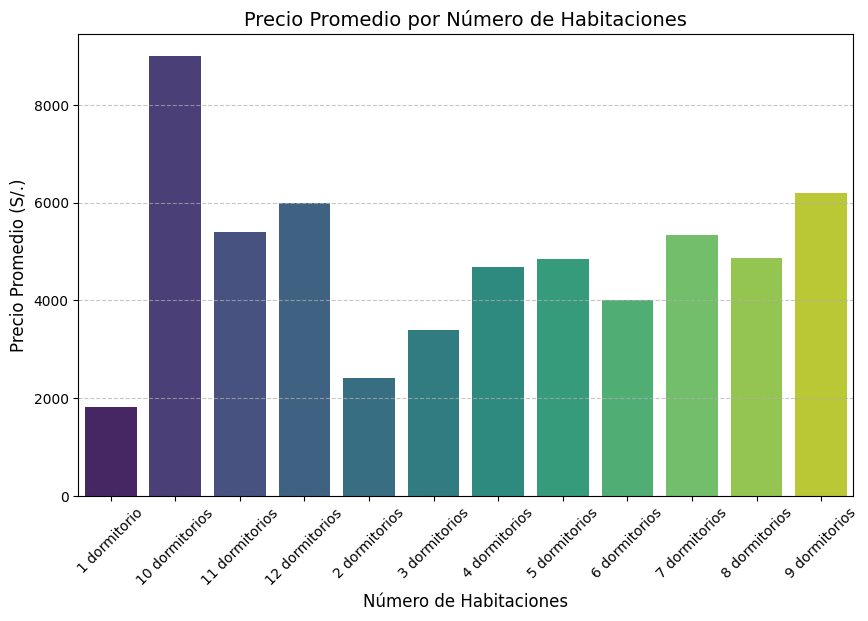

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el precio promedio por número de habitaciones
avg_price_per_bedroom = df.groupby("bedroom")["price_final_pen"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="bedroom", y="price_final_pen", data=avg_price_per_bedroom, palette="viridis")

plt.title("Precio Promedio por Número de Habitaciones", fontsize=14)
plt.xlabel("Número de Habitaciones", fontsize=12)
plt.ylabel("Precio Promedio (S/.)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [16]:
df["year_contruction"] = df["year_contruction"].astype(int)
print(df["year_contruction"].describe())

count     996.000000
mean     2002.536145
std       144.425160
min         2.000000
25%      2010.000000
50%      2018.000000
75%      2022.000000
max      2028.000000
Name: year_contruction, dtype: float64


In [17]:

df["year_contruction"] = pd.to_numeric(df["year_contruction"], errors="coerce")

df = df[(df["year_contruction"] >= 1900) & (df["year_contruction"] <= 2025)]

df["year_contruction"] = df["year_contruction"].astype(int)

print(df["year_contruction"].describe())

count     988.000000
mean     2013.649798
std        11.201608
min      1958.000000
25%      2010.000000
50%      2018.000000
75%      2022.000000
max      2023.000000
Name: year_contruction, dtype: float64


/tmp/ipython-input-1373747358.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="year_contruction", y="price_final_pen", data=df, estimator="mean", ci=None, color="orange")


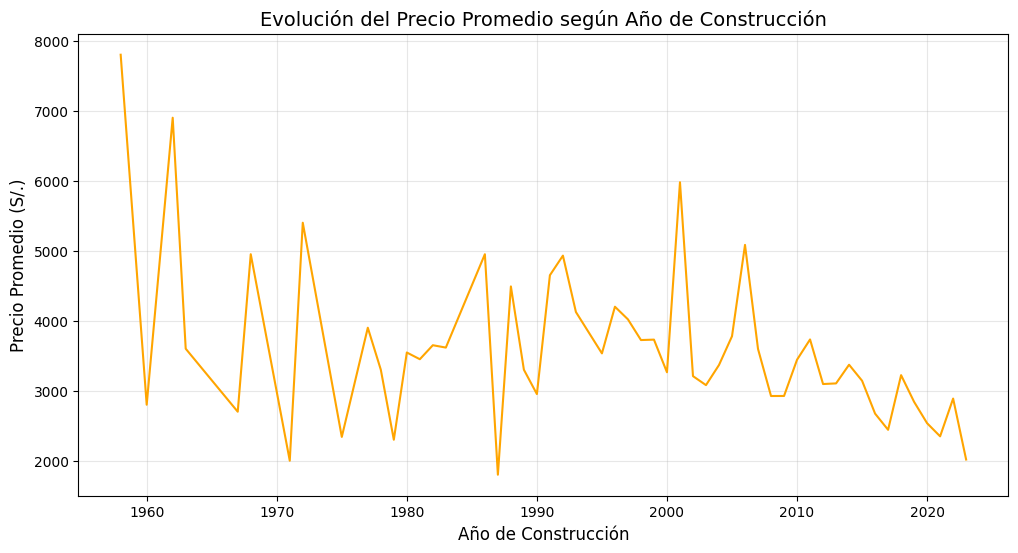

In [18]:
plt.figure(figsize=(12,6))
sns.lineplot(x="year_contruction", y="price_final_pen", data=df, estimator="mean", ci=None, color="orange")

plt.title("Evolución del Precio Promedio según Año de Construcción", fontsize=14)
plt.xlabel("Año de Construcción", fontsize=12)
plt.ylabel("Precio Promedio (S/.)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

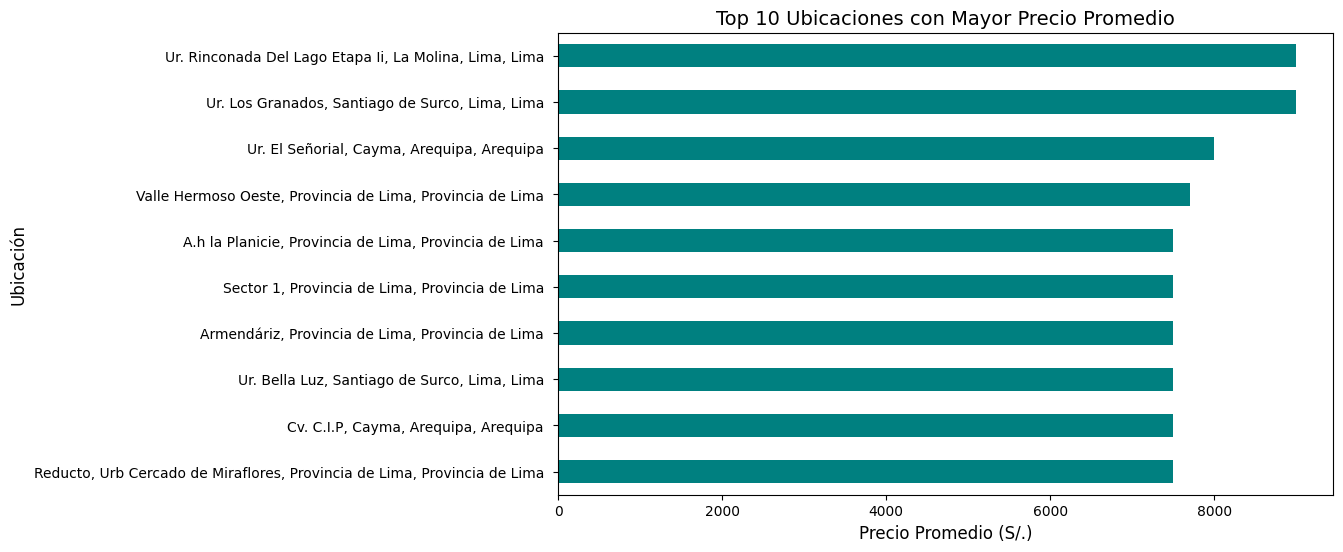

In [19]:
avg_price_location = df.groupby("location")["price_final_pen"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
avg_price_location.plot(kind="barh", color="teal")
plt.title("Top 10 Ubicaciones con Mayor Precio Promedio", fontsize=14)
plt.xlabel("Precio Promedio (S/.)", fontsize=12)
plt.ylabel("Ubicación", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

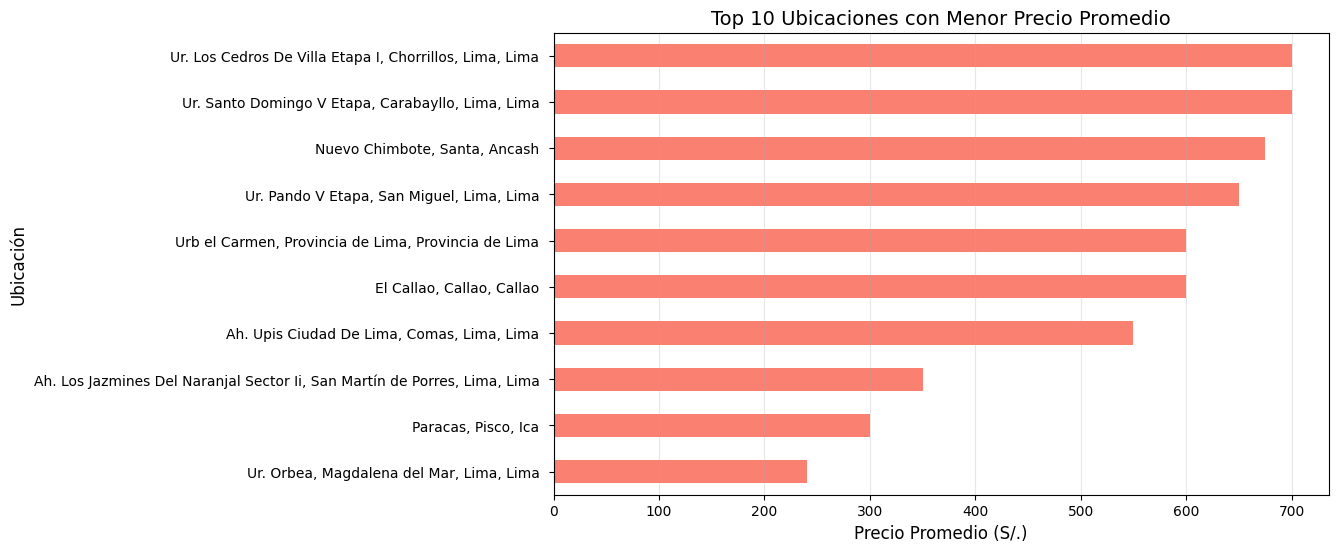

In [20]:
avg_price_location = df.groupby("location")["price_final_pen"].mean().sort_values(ascending=True).head(10)

plt.figure(figsize=(10,6))
avg_price_location.plot(kind="barh", color="salmon")

plt.title("Top 10 Ubicaciones con Menor Precio Promedio", fontsize=14)
plt.xlabel("Precio Promedio (S/.)", fontsize=12)
plt.ylabel("Ubicación", fontsize=12)
plt.grid(axis="x", alpha=0.3)
plt.show()
